#### Notebook for verifying airspeed calculation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')

from wind2watts.fit.util import fit_to_df
from wind2watts.data.util import velocity_vector, airspeed

In [2]:
df = pd.read_csv('../../data/dataframes/strava_export/3201353048.csv', parse_dates=['timestamp'])

In [3]:
for i in range(1, len(df)):
    lat1 = df.iloc[i - 1]["position_lat"]
    lon1 = df.iloc[i - 1]["position_long"]
    lat2 = df.iloc[i]["position_lat"]
    lon2 = df.iloc[i]["position_long"]
    time1 = df.iloc[i - 1]["timestamp"]
    time2 = df.iloc[i]["timestamp"]

    direction, speed = velocity_vector(lat1, lon1, time1, lat2, lon2, time2)

    df.at[i, "direction"] = direction
    df.at[i, "speed_calc"] = speed

df["airspeed"] = airspeed(
    df["speed_calc"].values,
    df["direction"].values,
    df["wind_speed"].values,
    df["wind_direction"].values,
)

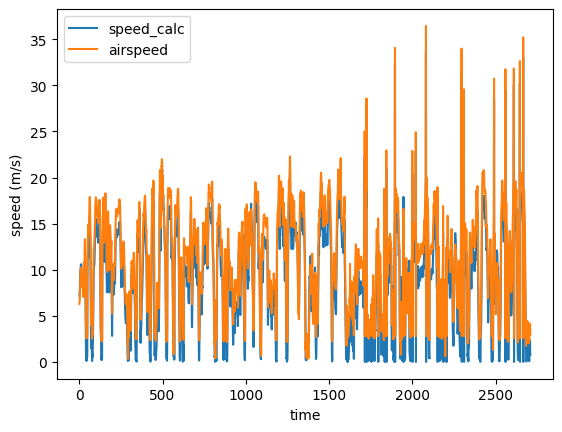

In [4]:
plt.plot(df['speed_calc'], label='speed_calc')
plt.plot(df['airspeed'], label='airspeed')
plt.xlabel('time')
plt.ylabel('speed (m/s)')
plt.legend()

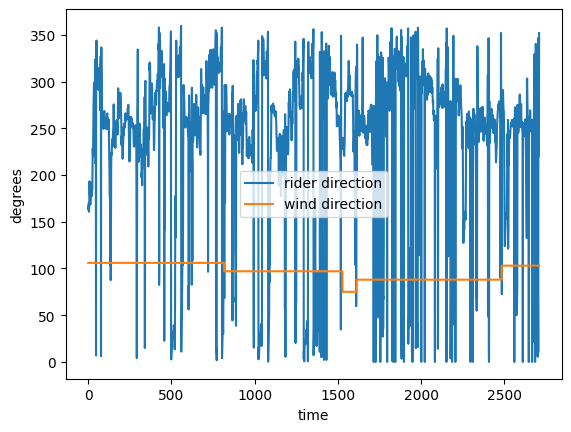

In [5]:
plt.plot(df['direction'], label='rider direction')
plt.plot(df['wind_direction'], label='wind direction')
plt.xlabel('time')
plt.ylabel('degrees')
plt.legend()